# MINOR PROJECT ON MACHINE LEARNING

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [12]:
red=pd.read_csv('winequality-red.csv')

# TASK 1 - Exploratory Data Analysis

# QUESTION 1

In [ ]:
#Are there any missing values in the wine dataset? How should these missing values be handled?

In [4]:
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Hence there are no missing values present in the dataset

# QUESTION 2

In [ ]:
#Are there any duplicate entries in the dataset that need to be identified and removed?

In [5]:
red.duplicated() #identifying duplicate values

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [6]:
red.duplicated().sum()

240

In [10]:
redwine=red.drop_duplicates()

In [12]:
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
redwine.shape

(1359, 12)

In [ ]:
#Duplicate values have been removed successfully

# QUESTION 3

In [ ]:
#Can we create visualizations to understand the relationship between different physicochemical properties (e.g., acidity, alcohol content) and the sensory rating of the wine?

Text(0.5, 1.0, 'fixed acidity')

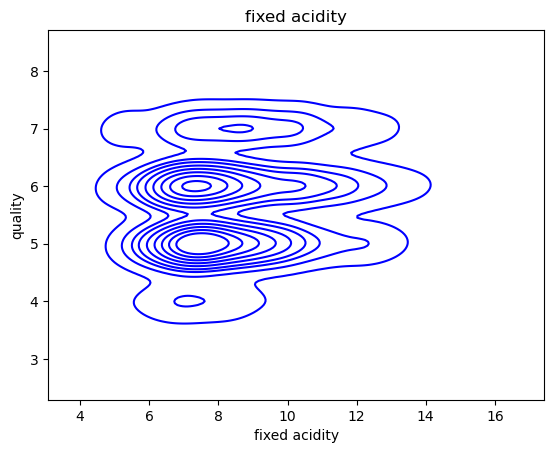

In [45]:
sns.kdeplot(data =red,x ='fixed acidity',y='quality',color='blue')
plt.title("fixed acidity")

Text(0.5, 1.0, 'volatile acidity')

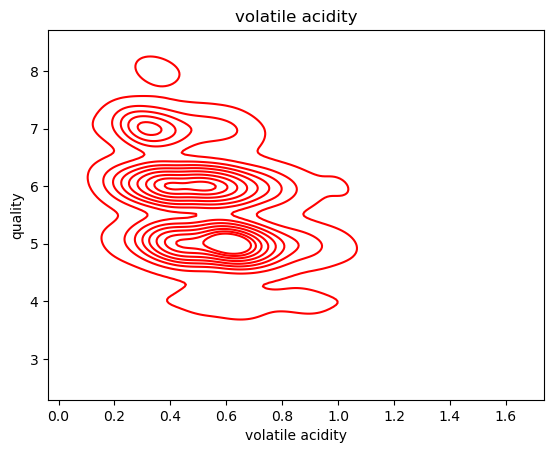

In [46]:
sns.kdeplot(data = red,x ='volatile acidity',y='quality',color='red')
plt.title("volatile acidity")

Text(0.5, 1.0, 'citric acidity')

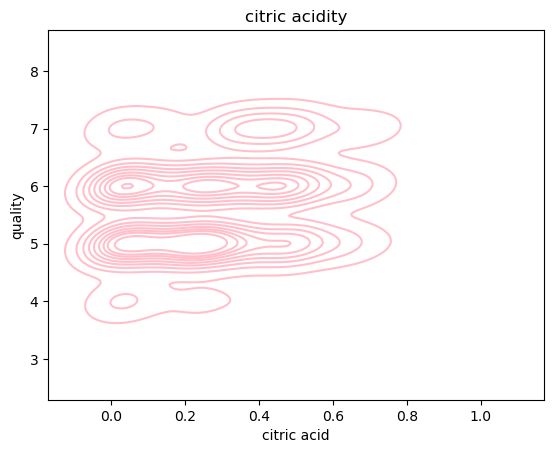

In [55]:
sns.kdeplot(data = red,x ='citric acid',y='quality',color='pink')
plt.title("citric acidity")

Text(0.5, 1.0, 'residual sugar')

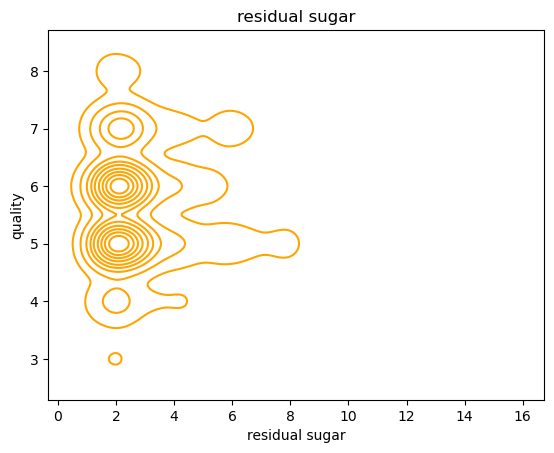

In [47]:
sns.kdeplot(data = red,x ='residual sugar',y='quality',color='orange')
plt.title("residual sugar")

Text(0.5, 1.0, 'chlorides')

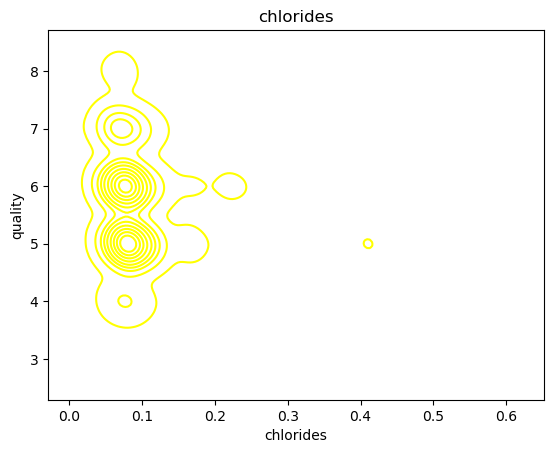

In [48]:
sns.kdeplot(data=red,x='chlorides',y='quality',color='yellow')
plt.title("chlorides")

Text(0.5, 1.0, 'free sulfur dioxide')

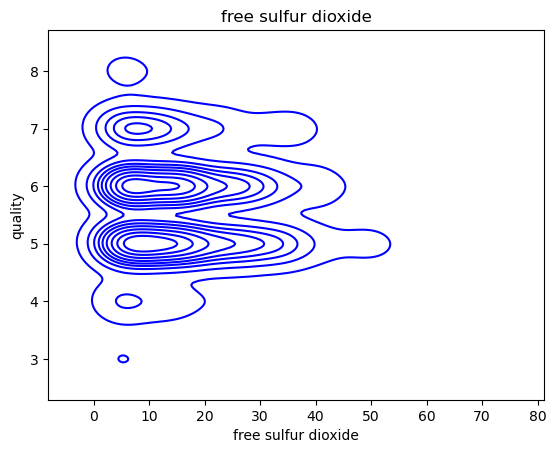

In [54]:
sns.kdeplot(data=red,x='free sulfur dioxide',y='quality',color='blue')
plt.title("free sulfur dioxide")

Text(0.5, 1.0, 'total sulfur dioxide')

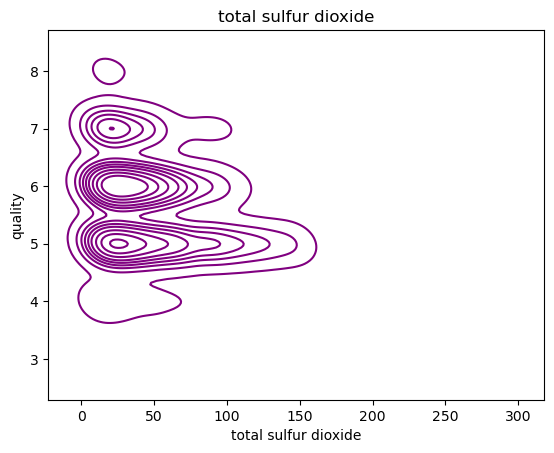

In [49]:
sns.kdeplot(data=red,x='total sulfur dioxide',y='quality',color='purple')
plt.title("total sulfur dioxide")

Text(0.5, 1.0, 'density')

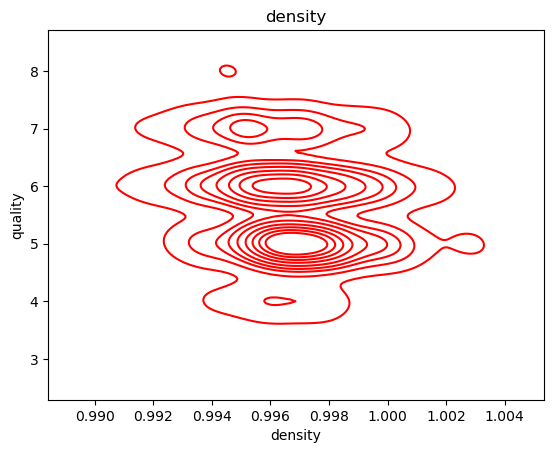

In [53]:
sns.kdeplot(data=red,x='density',y='quality',color='red')
plt.title("density")

Text(0.5, 1.0, 'pH')

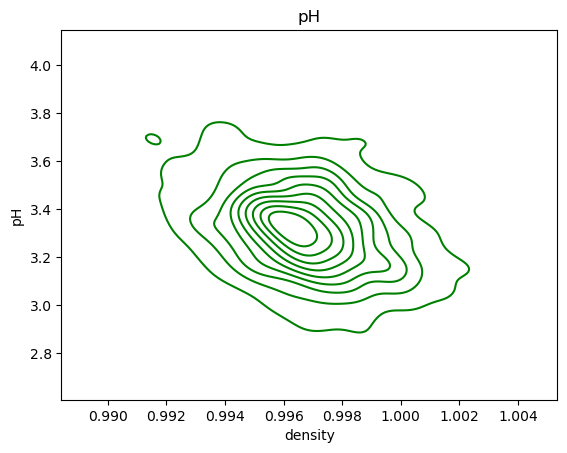

In [50]:
sns.kdeplot(data=red,x='density',y='pH',color='green')
plt.title("pH")

Text(0.5, 1.0, 'sulphates')

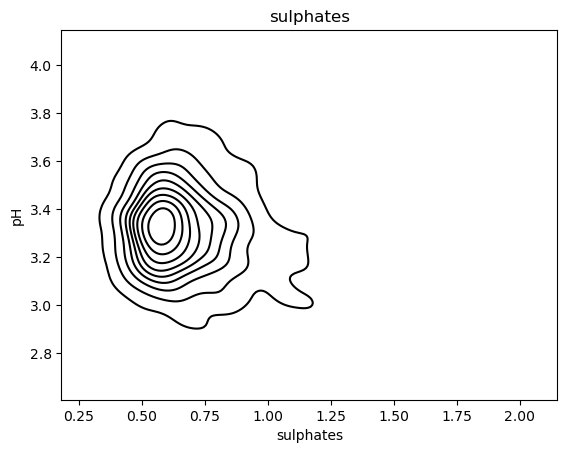

In [51]:
sns.kdeplot(data=red,x='sulphates',y='pH',color='black')
plt.title("sulphates")

Text(0.5, 1.0, 'alcohol')

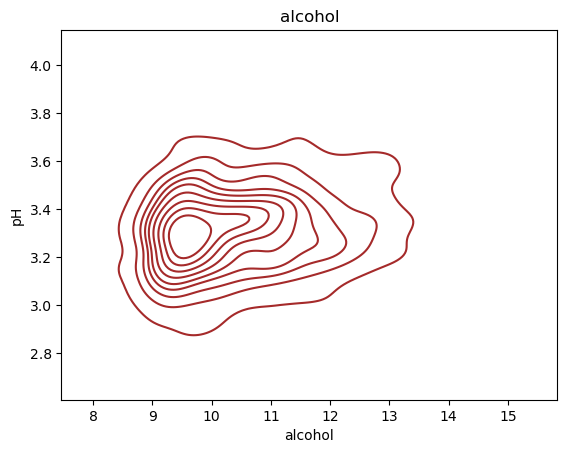

In [52]:
sns.kdeplot(data=red,x='alcohol',y='pH',color='brown')
plt.title("alcohol")

# QUESTION 4

In [ ]:
#Can we create visualizations to understand the relationship between different physicochemical properties (e.g., acidity, alcohol content) and the sensory rating of the wine?

<Axes: title={'center': 'Correlation with quality'}>

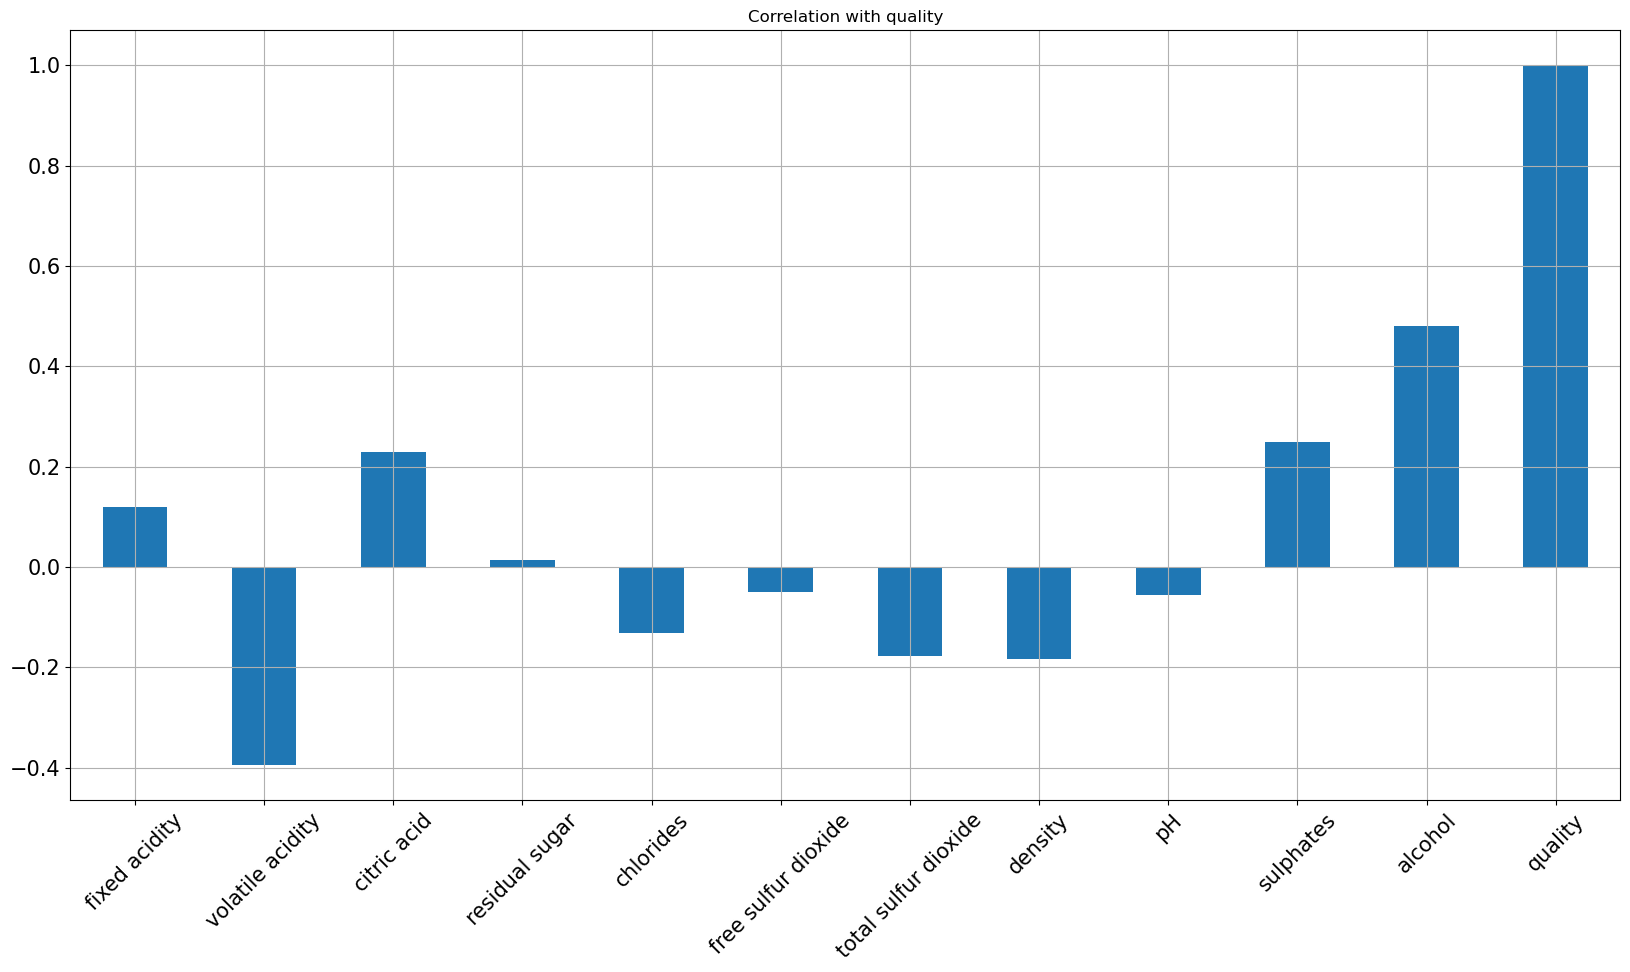

In [44]:
redwine.corrwith(redwine.quality).plot.bar(figsize = (20, 10), title = "Correlation with quality", fontsize = 15,rot = 45, grid = True)

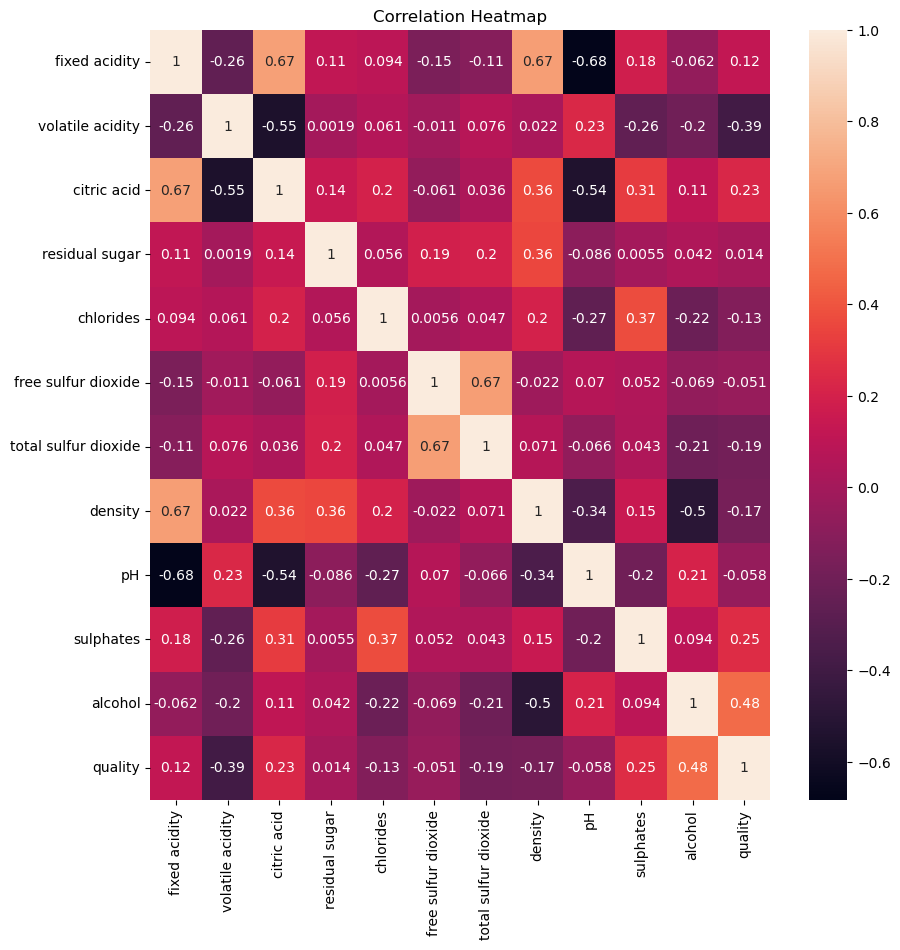

In [66]:
plt.figure(figsize=(10, 10))
sns.heatmap(red.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# QUESTION 5

In [ ]:
#Can we visualize the distribution of different quality ratings and their respective physicochemical property trends?

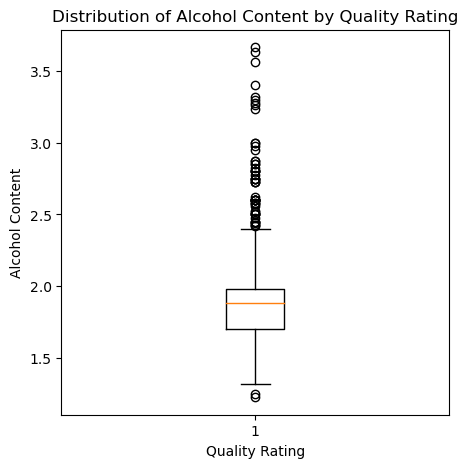

In [60]:
plt.figure(figsize=(5,5))
plt.boxplot(red["alcohol"]/red["quality"])
plt.title("Distribution of Alcohol Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("Alcohol Content")
plt.show()

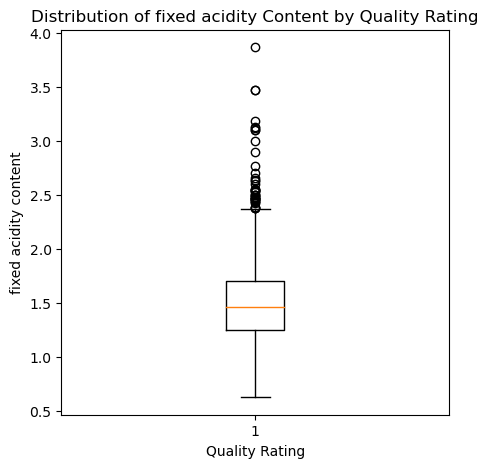

In [62]:
plt.figure(figsize=(5,5))
plt.boxplot(red["fixed acidity"]/red["quality"])
plt.title("Distribution of fixed acidity Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("fixed acidity content")
plt.show()

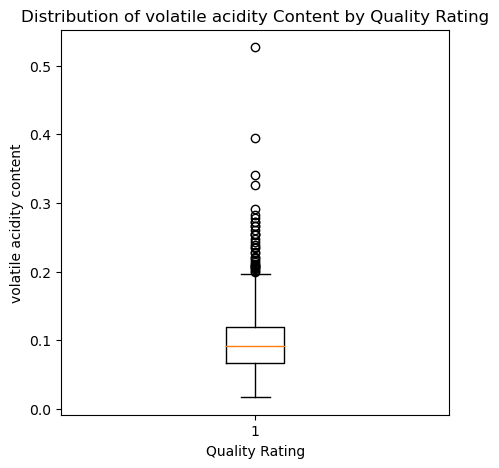

In [64]:
plt.figure(figsize=(5,5))
plt.boxplot(red["volatile acidity"]/red["quality"])
plt.title("Distribution of volatile acidity Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("volatile acidity content")
plt.show()

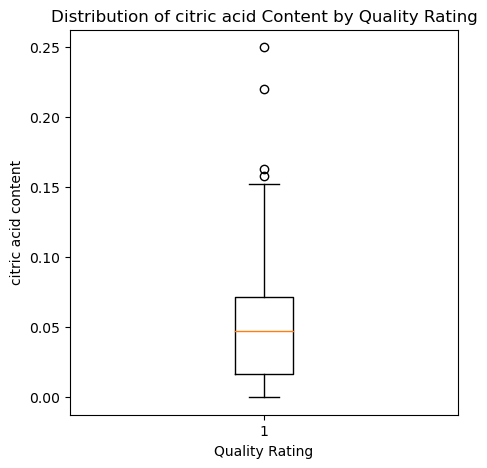

In [67]:
plt.figure(figsize=(5,5))
plt.boxplot(red["citric acid"]/red["quality"])
plt.title("Distribution of citric acid Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("citric acid content")
plt.show()

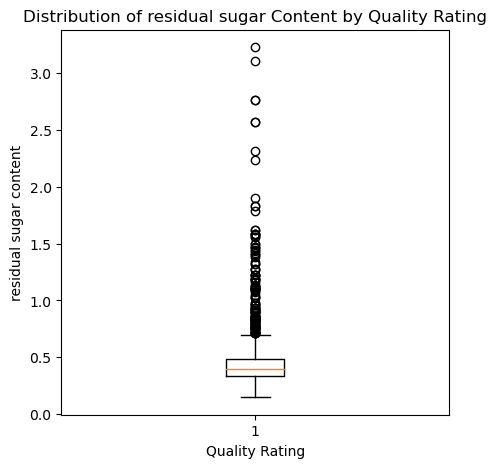

In [68]:
plt.figure(figsize=(5,5))
plt.boxplot(red["residual sugar"]/red["quality"])
plt.title("Distribution of residual sugar Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("residual sugar content")
plt.show()

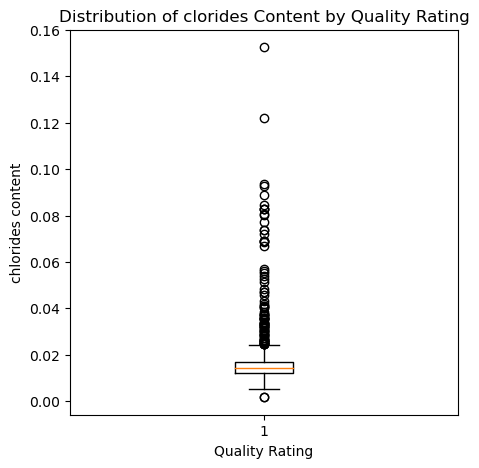

In [70]:
plt.figure(figsize=(5,5))
plt.boxplot(red["chlorides"]/red["quality"])
plt.title("Distribution of clorides Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("chlorides content")
plt.show()

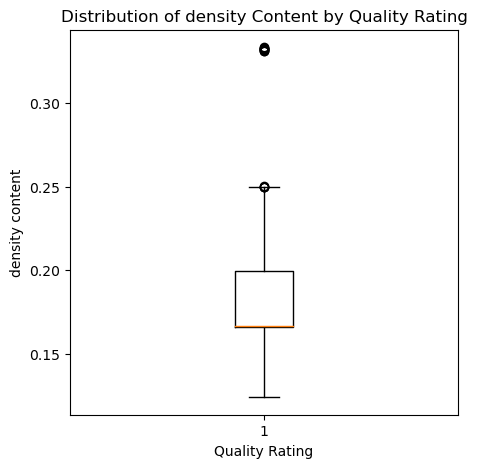

In [71]:
plt.figure(figsize=(5,5))
plt.boxplot(red["density"]/red["quality"])
plt.title("Distribution of density Content by Quality Rating")
plt.xlabel("Quality Rating")
plt.ylabel("density content")
plt.show()

# TASK 2 - Classification/Regression

In [13]:
type(red)

pandas.core.frame.DataFrame

In [76]:
red.shape

(1599, 12)

In [77]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [97]:
red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [79]:
red['goodquality'] = [1 if x >= 7 else 0 for x in red['quality']] #wine with quality equal to or more than 7 is considered good
#X = red.drop(['quality','goodquality'], axis = 1)
#Y = red['goodquality']

In [81]:
red['goodquality'].value_counts() #we are trying to understand how many good quality wine are present in the dataset

0    1382
1     217
Name: goodquality, dtype: int64

In [16]:
X =red.drop(columns ='quality', axis=1)
Y =red['quality']

In [73]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [74]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [82]:
scaler=StandardScaler()

In [84]:
scaler.fit(X)

StandardScaler()

In [85]:
standardized_data = scaler.transform(X)

In [86]:
print(standardized_data)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [87]:
X = standardized_data
Y = red['quality']

In [88]:
print(X)
print(Y)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) #splitting the dataset

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
class_ = ExtraTreesClassifier()
class_.fit(X,Y)
score = class_.feature_importances_
print(score)

[0.08120065 0.09400882 0.08019445 0.07937371 0.07746107 0.07375568
 0.1043651  0.0848125  0.07601826 0.1045369  0.14427287]


In [24]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Create the target variable

red['goodquality'] = [1 if x >= 7 else 0 for x in red['quality']] #wine with quality equal to or more than 7 is considered good
X = red.drop(['quality','goodquality'], axis = 1)
Y = red['quality']

# Scale the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, Y, test_size=0.2, random_state=2)

# Create a random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.603125
